# data cleaning

In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv(r"C:\Users\ADMIN\Documents\students_dataset_updated.csv")
dataset.head()

,student_id,name,age,test_score,grade,attendance_percentage,department
0,1,Alice,20.0,85.0,A,95.5,Computer Science
1,2,NaN,78.0,NaN,NaN,NaN,NaN
2,3,Charlie,21.0,NaN,B,92.5,Physics
3,4,David,19.0,92.0,A,NaN,Biology
4,5,Emma,22.0,65.0,C,85.5,NaN


In [10]:
dataset.isnull().sum()

student_id               0
name                     0
age                      0
test_score               0
grade                    0
attendance_percentage    0
department               0
dtype: int64

In [4]:
dataset.fillna({"name": dataset["name"].mode()[0]}, inplace=True)                      

In [5]:
dataset.columns = dataset.columns.str.strip()
dataset.fillna({"grade": dataset["grade"].mode()[0]}, inplace=True)

In [6]:
dataset.fillna({"age": dataset["age"].mode()[0]}, inplace=True)

In [7]:
dataset.fillna({"test_score": dataset["test_score"].mode()[0]}, inplace=True)

In [8]:
dataset.fillna({"attendance_percentage": dataset["attendance_percentage"].mode()[0]}, inplace=True)

In [9]:
dataset.fillna({"department": dataset["department"].mode()[0]}, inplace=True)

In [19]:
pv_data = dataset[["grade", "age"]]   # ENCODEING
pv_data

,grade,age
0,A,20.0
1,A,78.0
2,B,21.0
3,A,19.0
4,C,22.0
...,...,...
95,C,20.0
96,A,23.0
97,B,22.0
98,C,19.0


In [24]:
pd.get_dummies(pv_data).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      100 non-null    float64
 1   grade_A  100 non-null    bool   
 2   grade_B  100 non-null    bool   
 3   grade_C  100 non-null    bool   
dtypes: bool(3), float64(1)
memory usage: 1.2 KB


In [21]:
from sklearn.preprocessing import OneHotEncoder

In [33]:
fg=OneHotEncoder(drop="first")
fg.fit_transform(pv_data)     # to see, analyze , and transform data.
                            # SPARSE MATRIX - columns are filled with 0 and 1.

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 137 stored elements and shape (100, 12)>

In [34]:
fg=OneHotEncoder()
rv=fg.fit_transform(pv_data).toarray()

In [35]:
df = pd.DataFrame(rv[:, :3], columns=["grade_A", "grade_B", "grade_C"])
df

,grade_A,grade_B,grade_C
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
95,0.0,0.0,1.0
96,1.0,0.0,0.0
97,0.0,1.0,0.0
98,0.0,0.0,1.0


# Label Encoding  -  Nominal- not having connections or sequence.,  - ordinal- having sequence in data.

In [36]:
import pandas as pd

In [38]:
df = pd.DataFrame ({"name": ["netmax", "railway", "cow", "wood","party"]})
df

,name
0,netmax
1,railway
2,cow
3,wood
4,party


In [39]:
from sklearn.preprocessing import LabelEncoder

In [46]:
vc=LabelEncoder()
df["fg_name"]=vc.fit_transform(df["name"])      # used to deploy

In [47]:
df

,name,fg_name
0,netmax,1
1,railway,3
2,cow,0
3,wood,4
4,party,2


In [49]:
data=pd.read_csv(r"C:\Users\ADMIN\Documents\students_dataset_updated.csv")
data.head(3)

,student_id,name,age,test_score,grade,attendance_percentage,department
0,1,Alice,20.0,85.0,A,95.5,Computer Science
1,2,NaN,78.0,NaN,NaN,NaN,NaN
2,3,Charlie,21.0,NaN,B,92.5,Physics


In [56]:
data["attendance_percentage"].unique()

array([19, 23, 13,  0,  5, 22, 10,  3, 20,  8, 14,  6, 18, 16,  9, 21,  4,
       15,  7, 17, 12,  2, 11,  1])

In [51]:
la = LabelEncoder()
la.fit(data["attendance_percentage"])

LabelEncoder()

In [52]:
la.transform(dataset["attendance_percentage"])

array([19, 23, 13, 23,  0,  5, 23, 22, 23, 10,  3, 23, 23, 23, 20,  8, 14,
        6, 23, 18, 23, 13, 16,  9, 23, 21,  4, 23, 15,  7, 23, 17, 10, 23,
       23, 12,  2, 18, 11, 23, 16,  8, 23,  9,  3, 15, 23,  6, 18, 10, 12,
        4, 23, 16,  7, 11, 23,  1, 14, 19,  9, 23, 23,  8, 16,  5, 12, 23,
        4, 14, 23, 10,  7, 12, 23,  4, 16, 10, 18, 23, 12,  8, 14,  5, 17,
        9, 23, 13,  3, 23, 18, 23, 10,  5, 12, 23, 16,  8,  3, 15])

In [54]:
data["attendance_percentage"] = la.transform(dataset["attendance_percentage"])

# OUTLIERS - out of range

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [23]:
dataset=pd.read_csv(r"C:\Users\ADMIN\Documents\student_scores.csv")
dataset.head()

,StudyHours,Attendance,AssignmentsCompleted,ExamScore
0,5,80,8,65
1,7,85,10,72
2,3,70,5,55
3,9,90,12,80
4,6,75,7,68


In [24]:
dataset.info()
dataset.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   StudyHours            50 non-null     int64
 1   Attendance            50 non-null     int64
 2   AssignmentsCompleted  50 non-null     int64
 3   ExamScore             50 non-null     int64
dtypes: int64(4)
memory usage: 1.7 KB


StudyHours              0
Attendance              0
AssignmentsCompleted    0
ExamScore               0
dtype: int64

In [25]:
dataset.describe()

,StudyHours,Attendance,AssignmentsCompleted,ExamScore
count,50.000000,50.000000,50.000000,50.00000
mean,7.200000,82.000000,9.660000,72.08000
std,3.194383,11.264899,3.841821,12.28877
min,2.000000,60.000000,4.000000,50.00000
25%,5.000000,73.250000,6.250000,62.25000
50%,7.000000,83.500000,9.000000,72.50000
75%,9.000000,91.750000,12.750000,81.75000
max,14.000000,99.000000,18.000000,93.00000


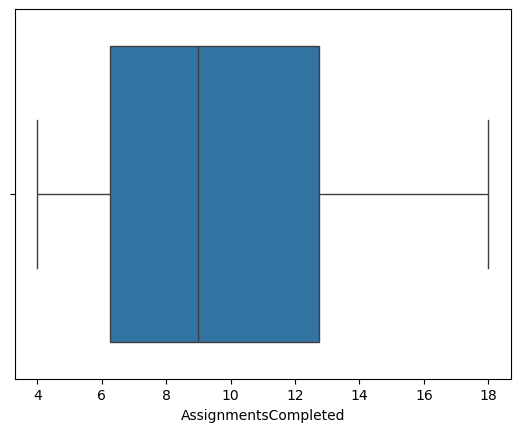

In [26]:
sns.boxplot(x="AssignmentsCompleted", data=dataset)
plt.show()

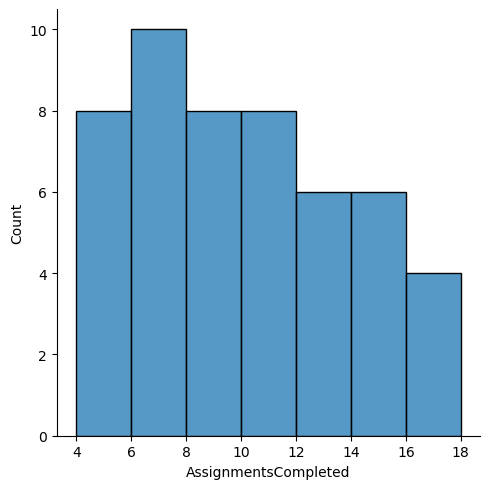

In [27]:
sns.displot(dataset["AssignmentsCompleted"])
plt.show()

In [28]:
dataset.shape

(50, 4)

In [40]:
q1=dataset["ExamScore"].quantile(0.25)
q3=dataset["ExamScore"].quantile(0.75)

In [41]:
Q1=np.percentile(dataset, 25)
Q1

np.float64(8.0)

In [42]:
Q3=np.percentile(dataset, 75)
Q3

np.float64(78.0)

In [43]:
IQR=Q3-Q1
IQR

np.float64(70.0)

In [44]:
min_range = Q1- 1.5 * IQR
min_range

np.float64(-97.0)

In [45]:
max_range = Q3- 1.5 * IQR
max_range

np.float64(-27.0)

In [47]:
new_dataset = dataset[dataset["ExamScore"]<=max_range]
new_dataset.shape

(0, 4)

# FEATURE SCAILING (NORMALIZATION)

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [45]:
dataset = pd.read_csv(r"C:\Users\ADMIN\Documents\quikr_car.csv")
dataset.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",NaN
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [46]:
dataset.drop_duplicates(inplace=True)
dataset

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",NaN
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",50000kms,NaN


In [47]:
# Load the dataset
#dataset = pd.read_csv(loadFileData("quikr_car.csv"))
dataset = pd.read_csv(r"C:\Users\ADMIN\Documents\quikr_car.csv")
# Clean the Price column
dataset = dataset [dataset ['Price'] != 'Ask For Price']
dataset ['Price'] = dataset ['Price'].str.replace(',', '').astype(float)

# Clean the kms_driven column
dataset  = dataset [dataset ['kms_driven'].notna()]
dataset ['kms_driven'] = dataset ['kms_driven'].str.replace(' kms', '').str.replace(',', '')
dataset  = dataset [dataset ['kms_driven'].str.isnumeric()]
dataset ['kms_driven'] = dataset ['kms_driven'].astype(float)

# Clean the year column
dataset  = dataset [dataset ['year'].str.isnumeric()]
dataset ['year'] = dataset ['year'].astype(int)

# Drop rows with missing values in relevant columns
#dataset  = dataset .dropna(subset=['year', 'kms_driven', 'Price'])
# Drop rows with missing values in relevant columns
dataset = dataset.dropna(subset=['year', 'kms_driven', 'Price'])
dataset

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000.0,45000.0,NaN
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000.0,40.0,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000.0,28000.0,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000.0,36000.0,Diesel
6,Ford Figo,Ford,2012,175000.0,41000.0,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000.0,50000.0,Petrol
885,Tata Indica V2 DLE BS III,Tata,2009,110000.0,30000.0,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000.0,132000.0,Petrol
888,Tata Zest XM Diesel,Tata,2018,260000.0,27000.0,Diesel


In [48]:
dataset.isnull().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     2
dtype: int64

In [49]:
dataset.fillna({"fuel_type": dataset["fuel_type"].mode()[0]}, inplace=True)
dataset

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000.0,45000.0,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000.0,40.0,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000.0,28000.0,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000.0,36000.0,Diesel
6,Ford Figo,Ford,2012,175000.0,41000.0,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000.0,50000.0,Petrol
885,Tata Indica V2 DLE BS III,Tata,2009,110000.0,30000.0,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000.0,132000.0,Petrol
888,Tata Zest XM Diesel,Tata,2018,260000.0,27000.0,Diesel


In [50]:
dataset.describe()

,year,Price,kms_driven
count,817.000000,8.170000e+02,817.000000
mean,2012.440636,4.115503e+05,46250.714810
std,4.002354,4.749173e+05,34283.745254
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.900000e+05,56758.000000
max,2019.000000,8.500003e+06,400000.000000


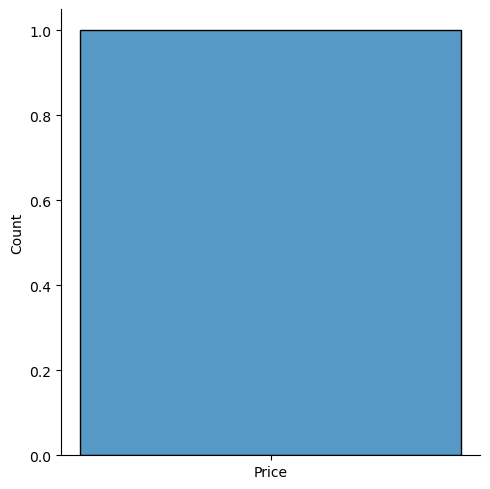

In [51]:
sns.displot(["Price"])
plt.show()

In [52]:
from sklearn.preprocessing import MinMaxScaler

In [53]:
ms = MinMaxScaler()
ms.fit(dataset [["Price"]])

MinMaxScaler()

In [54]:
dataset["Price_min"]=ms.transform(dataset [["Price"]])
dataset

,name,company,year,Price,kms_driven,fuel_type,Price_min
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000.0,45000.0,Petrol,0.005903
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000.0,40.0,Diesel,0.046635
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000.0,28000.0,Petrol,0.034829
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000.0,36000.0,Diesel,0.064345
6,Ford Figo,Ford,2012,175000.0,41000.0,Diesel,0.017119
...,...,...,...,...,...,...,...
883,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000.0,50000.0,Petrol,0.028335
885,Tata Indica V2 DLE BS III,Tata,2009,110000.0,30000.0,Diesel,0.009445
886,Toyota Corolla Altis,Toyota,2009,300000.0,132000.0,Petrol,0.031877
888,Tata Zest XM Diesel,Tata,2018,260000.0,27000.0,Diesel,0.027155


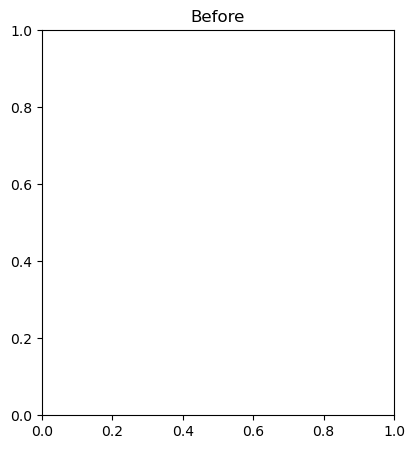

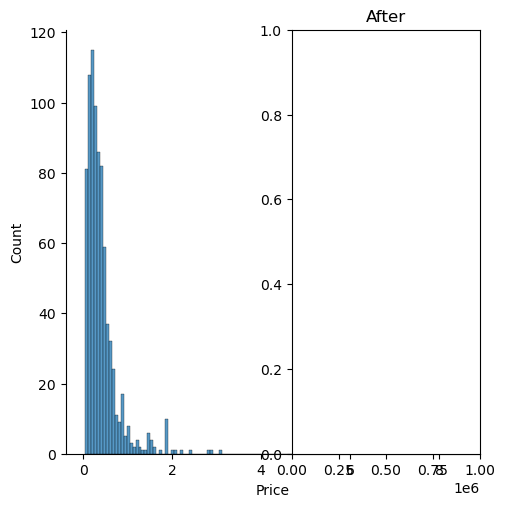

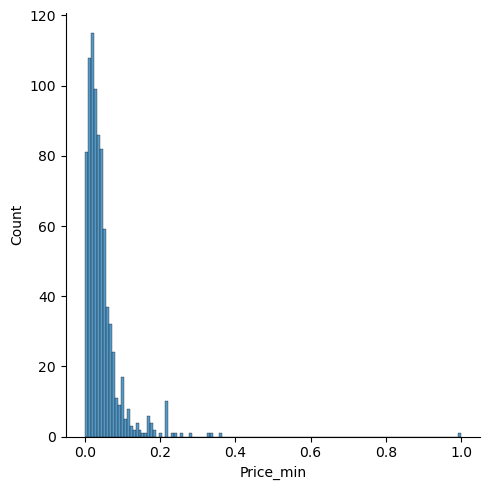

In [55]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.displot(dataset["Price"])

plt.subplot(1,2,2)
plt.title("After")
sns.displot(dataset["Price_min"])

plt.show()

# Function Transformer

In [56]:
from sklearn.preprocessing import FunctionTransformer 

In [57]:
ft=FunctionTransformer(func=np.log1p)

In [58]:
ft.fit(dataset[["Price"]])

FunctionTransformer(func=<ufunc 'log1p'>)

In [62]:
ft.transform(dataset[["Price"]])

,Price
0,11.289794
1,12.959847
3,12.691584
4,13.262127
6,12.072547
...,...
883,12.506181
885,11.608245
886,12.611541
888,12.468441


# TRAIN TEST SPLIT

In [1]:
import pandas as pd

In [4]:
dataset = pd.read_csv(r"C:\Users\ADMIN\Documents\student_scores.csv")
dataset.head()

,StudyHours,Attendance,AssignmentsCompleted,ExamScore
0,5,80,8,65
1,7,85,10,72
2,3,70,5,55
3,9,90,12,80
4,6,75,7,68


In [5]:
dataset.isnull().sum()

StudyHours              0
Attendance              0
AssignmentsCompleted    0
ExamScore               0
dtype: int64

In [14]:
input_data = dataset.iloc[:,:-1]
output_data = dataset["ExamScore"]

In [15]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test = train_test_split(input_data,output_data,test_size=0.20)

In [29]:
x_train.head()

,StudyHours,Attendance,AssignmentsCompleted
2,3,70,5
22,4,70,6
44,3,64,5
29,11,93,14
39,13,96,16


In [30]:
x_train.shape

(40, 3)

In [25]:
x_test.head(4)

,StudyHours,Attendance,AssignmentsCompleted
40,6,77,7
28,5,74,7
23,9,91,12
30,4,67,5


In [28]:
y_test.shape

(10,)

# REGRESSION - simple linear regression. y=mx+c.
# y = dependent var
# x = independent var
# m = slope
# c = intercept

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [34]:
dataset = pd.read_csv(r"C:\Users\ADMIN\Documents\student_simple_scores.csv")
dataset.head()

,StudyHours,ExamScore
0,5,65
1,7,72
2,3,55
3,9,80
4,6,68


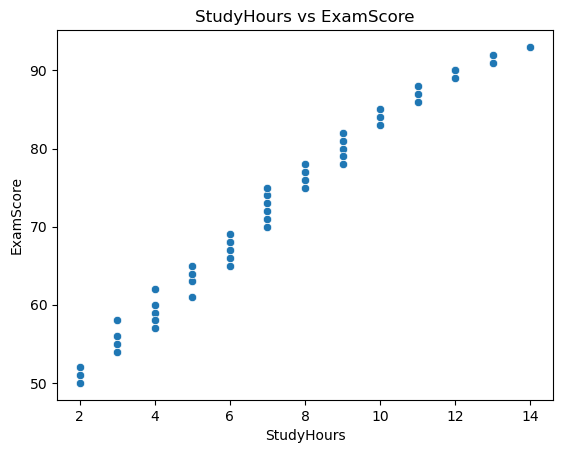

In [36]:
cj = ["StudyHours"]

for cj in cj:
    sns.scatterplot(x=cj, y="ExamScore", data=dataset)
    plt.title(f"{cj} vs ExamScore")
    plt.show()


In [37]:
dataset.isnull().sum()

StudyHours    0
ExamScore     0
dtype: int64

In [38]:
x=dataset[["StudyHours"]]
y=dataset["ExamScore"]

In [43]:
from sklearn.model_selection import train_test_split

x = dataset[["StudyHours"]]
y = dataset["ExamScore"]  # Make sure this is a 1D array

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [56]:
# y=mx+c

In [57]:
lr.coef_

array([4.02677029])

In [58]:
lr.intercept_

np.float64(43.4943005181347)

In [53]:
lr.score(x_test,y_test)*100    #   to check acuuracy score

95.1671206718109

In [54]:
# 5	65

In [62]:
lr.predict([[5]])    # fill value  and predict data.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([63.62815199])

In [63]:
y_prd=lr.predict(x)

NameError: name 'y_pred' is not defined

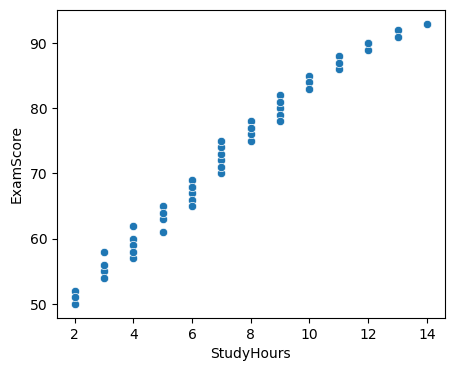

In [64]:
plt.figure(figsize=(5,4))
sns.scatterplot(x="StudyHours",y="ExamScore",data=dataset)
plt.plot(dataset["StudyHours"],y_pred,c="red")
plt.show()

# MULTIPLE LINEAR REGRESSION

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
dataset = pd.read_csv(r"C:\Users\ADMIN\Documents\housing_rental_prices.csv")
dataset.head()

,SquareFootage,Bedrooms,LocationScore,RentalPrice
0,1200,2,7.5,1800
1,1500,3,8.0,2200
2,1000,1,6.0,1400
3,1800,4,8.5,2600
4,1300,2,7.0,1900


In [32]:
dataset.isnull().sum()

SquareFootage    0
Bedrooms         0
LocationScore    0
RentalPrice      0
dtype: int64

In [33]:
dataset.shape

(50, 4)

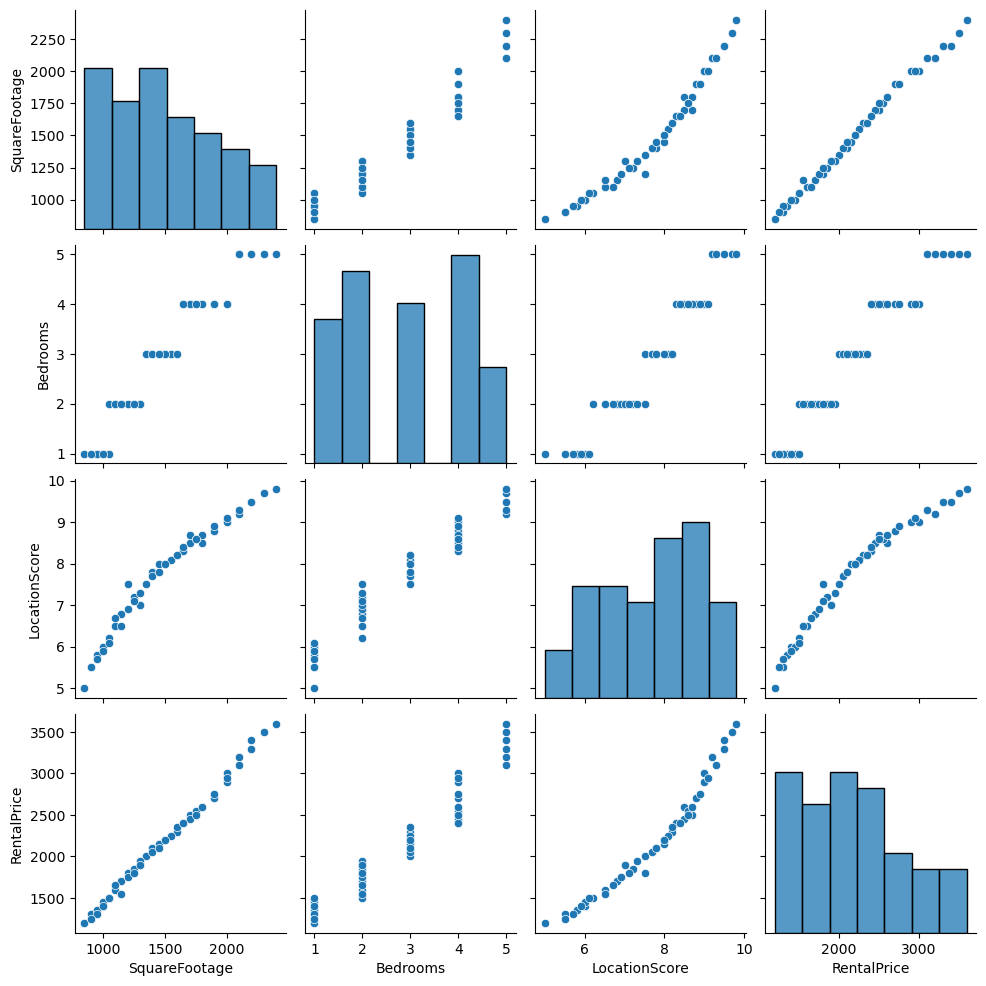

In [34]:
sns.pairplot(data=dataset)
plt.show()

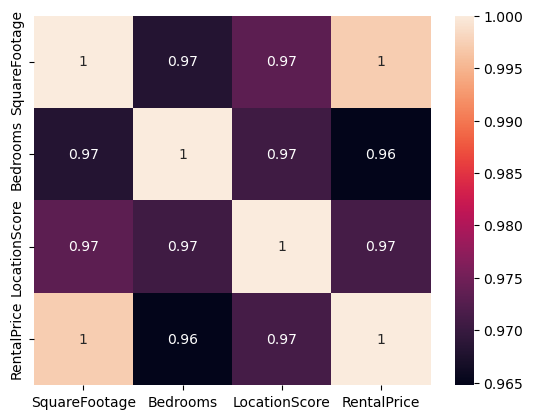

In [35]:
sns.heatmap(data=dataset.corr(),annot=True)
plt.show()

In [36]:
x = dataset.iloc[:,:-1]
x

,SquareFootage,Bedrooms,LocationScore
0,1200,2,7.5
1,1500,3,8.0
2,1000,1,6.0
3,1800,4,8.5
4,1300,2,7.0
5,1100,2,6.5
6,2000,4,9.0
7,1400,3,7.8
8,900,1,5.5
9,1600,3,8.2


In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
dataset = pd.read_csv(r"C:\Users\ADMIN\Documents\housing_rental_prices.csv")
dataset.head()

,SquareFootage,Bedrooms,LocationScore,RentalPrice
0,1200,2,7.5,1800
1,1500,3,8.0,2200
2,1000,1,6.0,1400
3,1800,4,8.5,2600
4,1300,2,7.0,1900


In [39]:
dataset.isnull().sum()

SquareFootage    0
Bedrooms         0
LocationScore    0
RentalPrice      0
dtype: int64

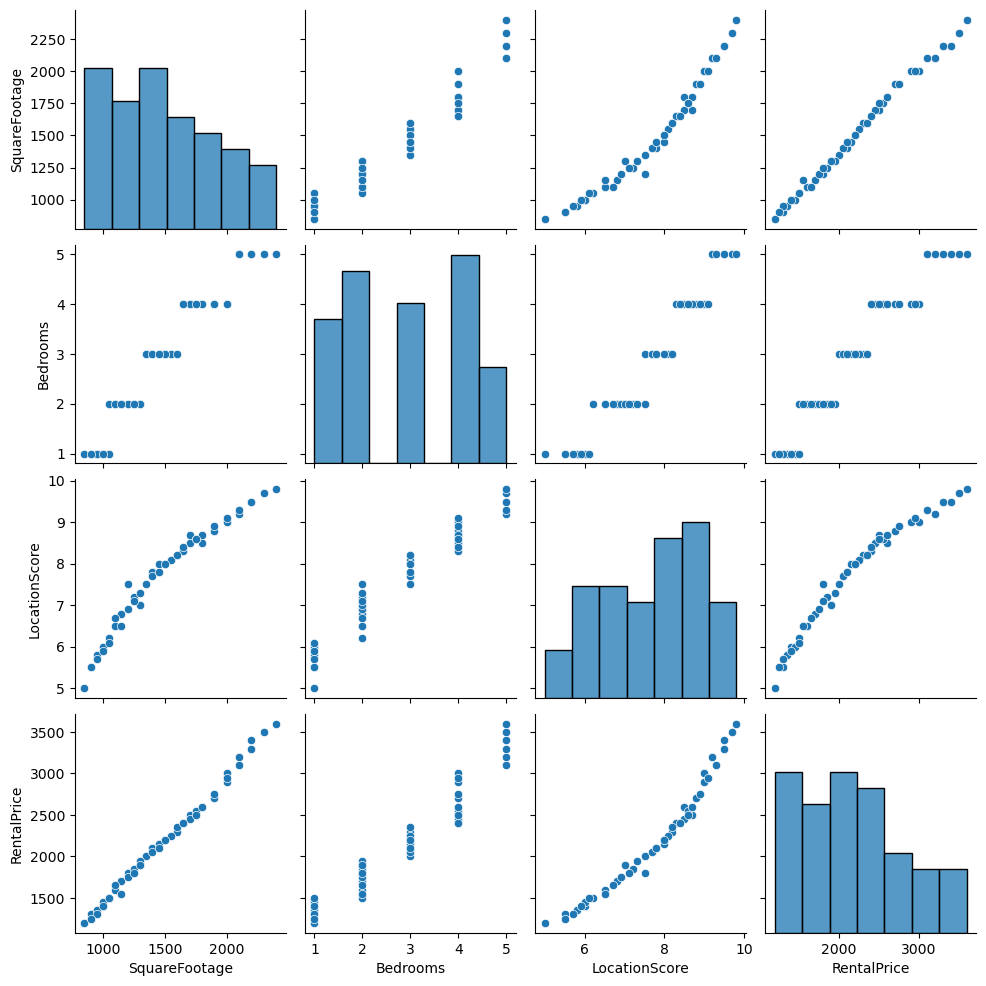

In [40]:
sns.pairplot(data=dataset)
plt.show()

In [41]:
x = dataset.iloc[:,:-1]
y = dataset["RentalPrice"]

In [42]:
x.ndim

2

In [43]:
dataset.shape

(50, 4)

In [44]:
from sklearn.model_selection import train_test_split

In [51]:
c

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
lr = LinearRegression()

In [54]:
lr.fit(x_train,y_train)

LinearRegression()

In [56]:
lr.score(x_test,y_test)*100

99.60464357748506

In [57]:
lr.coef_

array([ 1.43132543,  3.89133393, 28.32570098])

In [58]:
lr.intercept_

np.float64(-184.69056227511874)

In [60]:
x.columns

Index(['SquareFootage', 'Bedrooms', 'LocationScore'], dtype='object')

In [61]:
lr.predict(x_test)

array([1816.19393474, 3252.77620318, 1736.12995316, 2951.28950372,
       2427.66504395, 2579.29529681, 3547.53899862, 1177.45588838,
       3103.97852042, 3401.57388595])

# CLASSIFICATION ALGORITHM

#  Classification analysis is a technique used in data science and machine learning to sort data into categories or classes based on shared characteristics. 
# eg - Classifying emails as "spam" or "not spam"
# yes or no

# Tpyes of ml classification algorithms 
# 1 - Non-Linear Classification Algorithms
# - k-Nearest Neighbors (k-NN): Classifies based on proximity, forming irregular decision boundaries.
# - Kernel SVM: Uses the kernel trick to transform data into a higher-dimensional space where it becomes linearly separable.
# - Decision Trees: Split data based on feature thresholds, creating non-linear boundaries.
# - Random Forests: An ensemble of decision trees for more robust non-linear class


# 2 -  Linear Classification Algorithms
# - Logistic Regression: Predicts probabilities using a linear decision boundary.
# - Linear Support Vector Machine (SVM): Finds the optimal hyperplane that separates classes.

# Encoding